<a href="https://colab.research.google.com/github/hassanjavaid07/CS500-Generative-AI-and-LLM/blob/main/Assignment01/assignment01_MSCS23001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
###<u> **GENERATIVE AI & LLM ASSIGNMENT # 1** </u>
* **NAME = HASSAN JAVAID**
* **ROLL NO. = MSCS23001**
* **TITLE = RANDOM NUMBER GENERATORS**
* **TASKS = Implementation of Uniform, Gaussian and Multi-variate Gaussian
* **        generators and sampling thru them**
* **ALGORITHM used: Uniform, Gaussian, MV Gaussian Distributions **
"""

##  **GENERATIVE AI & LLM ASSIGNMENT # 1**
#### **NAME = HASSAN JAVAID**
#### **ROLL_NO = MSCS23001**
#### **TITLE = RANDOM NUMBER GENERATORS**
#### **TASKS = Implementation of Uniform, Gaussian and Multi-variate Gaussian**
#### **generators and sampling thru them**
#### **Algorithms used: Uniform, Gaussian, MV Gaussian Distributions**
#### **Github Link:** https://github.com/hassanjavaid07/CS500-Generative-AI-and-LLM/tree/main/Assignment01

# Assignment 01 - RNGs-dists
Implementation of Uniform, Gaussian and Multi-variate Gaussian distributions and sampling thru them to generate random numbers. Hence these implementations behave PRNGs for obtaining random sampling of points.

In [1]:
from urllib.request import url2pathname
import numpy as np
from matplotlib import pyplot as plt
from typing import List, Optional
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

COUNT=1000000

class RNG:

    @staticmethod
    def uniform(count: int) -> np.ndarray:
        return np.random.uniform(size=count)

    @staticmethod
    def gaussian(count: int,
                 mean: float = 0,
                 std_dev: float = 1) -> np.ndarray:
        ctr = count//2
        u1 = np.random.uniform(size=ctr)
        u2 = np.random.uniform(size=ctr)
        z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
        samples = np.concatenate((z0, z1))
        return mean + std_dev * samples


    @staticmethod
    def mv_gaussian(mean_vec: List[float], cov_matrix: List[List[float]], count: int=5000) -> np.ndarray:
        mean_vec = np.array(mean_vec)
        cov_matrix = np.array(cov_matrix)

        eig_v, eig_vectors = np.linalg.eigh(cov_matrix)
        svd_matrix = eig_vectors @ np.diag(np.sqrt(eig_v))
        z_pts = RNG.gaussian(count * len(mean_vec), 0, 1).reshape(count, len(mean_vec))
        mv_pts = mean_vec + z_pts @ svd_matrix.T

        return mv_pts

In [2]:
RNG.uniform(20)

array([0.49502885, 0.1078279 , 0.78186779, 0.2183557 , 0.52596234,
       0.57953056, 0.82529026, 0.99972967, 0.25552942, 0.24682064,
       0.0988814 , 0.10052687, 0.95620875, 0.78557541, 0.90925193,
       0.27472639, 0.89491149, 0.8667608 , 0.73885837, 0.82765904])

In [3]:
RNG.gaussian(20, 0.5, 0.5)

array([ 0.24919761,  0.90905856, -0.22302096,  0.17992337,  0.67886094,
        0.12832542, -0.17843613,  0.04097078, -0.42186203,  0.48480246,
        0.70131247,  0.65755094,  0.41791182,  0.49235684,  0.65730785,
        1.0452193 ,  0.18020634,  0.05604688, -0.27883463,  0.96526644])

In [4]:
RNG.mv_gaussian([0, 0], [[1, 0], [0, 1]], 20)

array([[ 1.02232651, -1.5271228 ],
       [-1.49999022, -0.91844686],
       [-0.23422102, -1.10777804],
       [ 0.62064515,  1.63771693],
       [-0.23675037,  1.43252258],
       [-0.60149984, -1.133142  ],
       [-0.97206866,  0.85240041],
       [-2.04936802,  0.57633437],
       [-0.25852863,  1.36841487],
       [-1.46228714,  0.77448946],
       [-0.8075298 , -2.03257498],
       [ 0.82925717,  2.54227203],
       [-0.80896593,  0.99001967],
       [ 0.30605634,  0.91732701],
       [ 0.53471751,  0.64968514],
       [ 0.02393377, -0.62908081],
       [ 1.23830772,  0.05608716],
       [ 0.55533726,  0.20001906],
       [ 0.05086029, -1.66480174],
       [-0.60827806,  0.24684706]])

##Plotting Functions

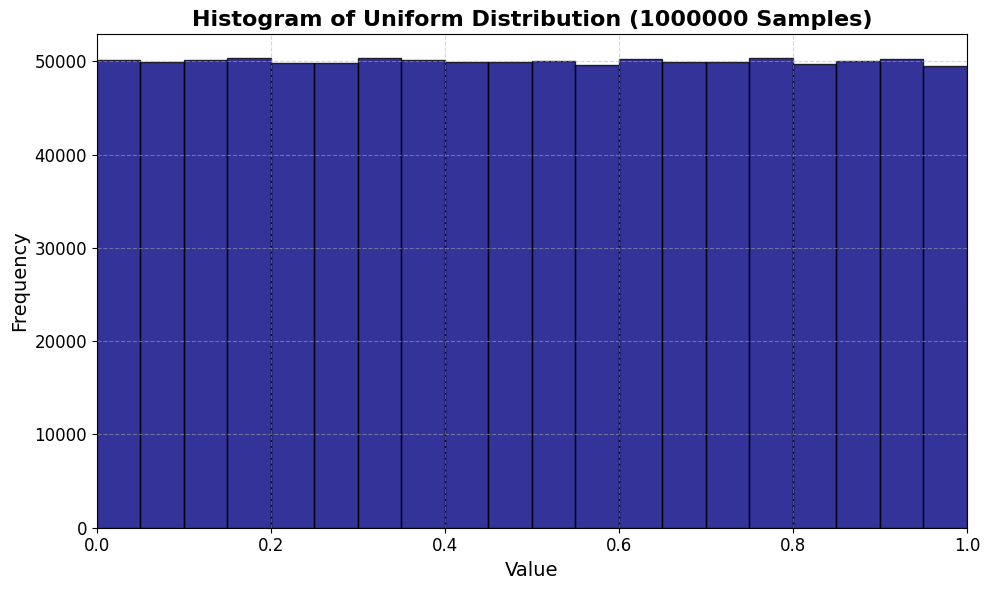

In [ ]:
# Implements the histogram plot for Gaussian
def genUniformPlot(count:int=5000):
    samples = RNG.uniform(count)
    plt.figure(figsize=(10, 6))
    plt.hist(samples, bins=20, color='navy', edgecolor='black', alpha=0.8)
    plt.title(f'Histogram of Uniform Distribution ({count} Samples)', fontsize=16, weight='bold')
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

genUniformPlot(COUNT)

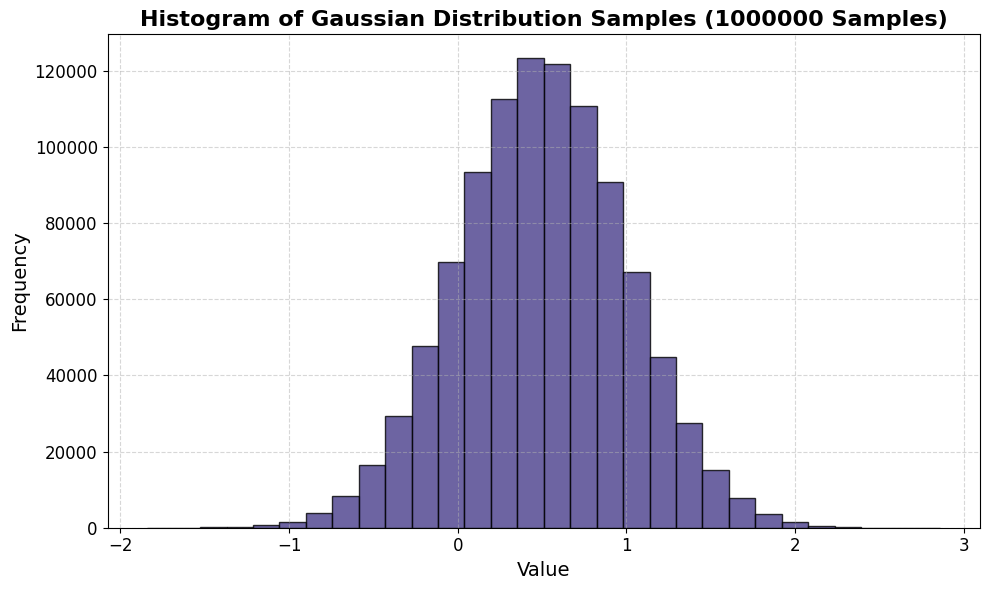

In [ ]:
# Implements the histogram plot for Gaussian
def genGaussianPlot(count=5000, mean=0, std_dev=1):
    samples = RNG.gaussian(count, 0.5, 0.5)
    plt.figure(figsize=(10, 6))
    plt.hist(samples, bins=30, color='darkslateblue', edgecolor='black', alpha=0.8)
    plt.title(f'Histogram of Gaussian Distribution Samples ({count} Samples)', fontsize=16, weight='bold')
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

genGaussianPlot(COUNT)

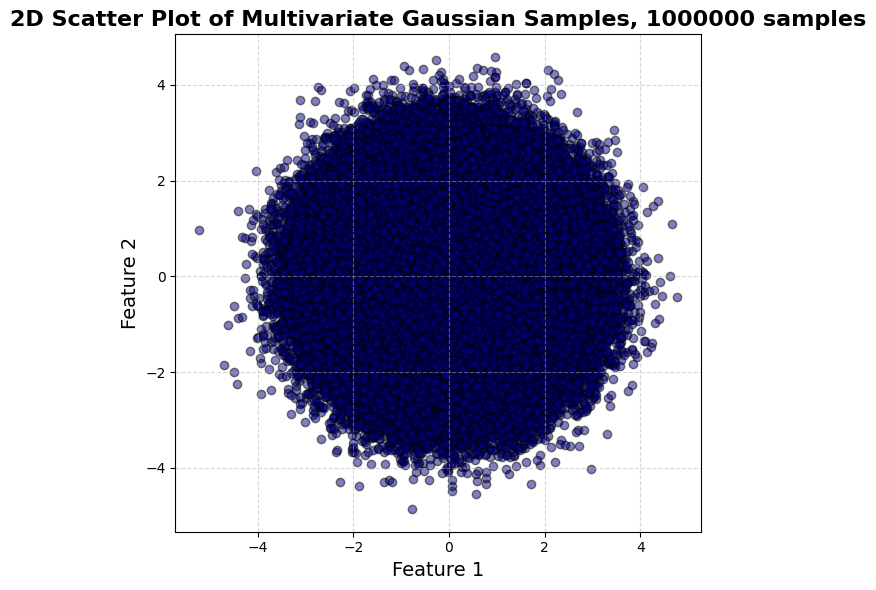

In [12]:
# Implements the 2D scatter plot for MV Gaussian
def genMVGaussianPlot_2d(samples: np.ndarray, count: int=1000):
    plt.figure(figsize=(10, 6))
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, color='navy', edgecolor='black')
    plt.title(f'2D Scatter Plot of Multivariate Gaussian Samples, {count} samples', fontsize=16, weight='bold')
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.gca().set_aspect('equal', adjustable='box')  # Enforce equal aspect ratio
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# Generate 2D samples pts
mean_vector_2d = [0, 0]
cov_matrix_2d = [[1, 0], [0, 1]]
samples_2d = RNG.mv_gaussian(mean_vector_2d, cov_matrix_2d, count=COUNT)
genMVGaussianPlot_2d(samples_2d, COUNT)

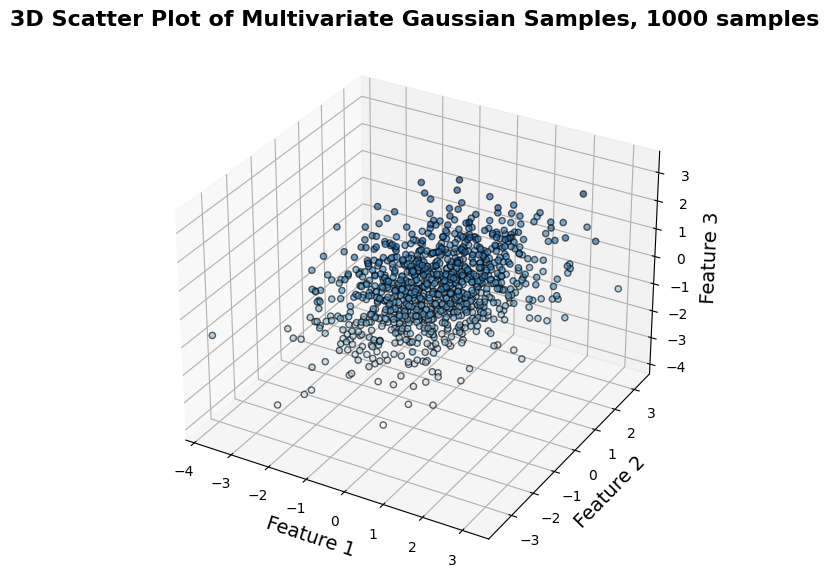

In [ ]:
# Implements the 3D scatter plot for MV Gaussian
def genMVGaussianPlot_3d(samples: np.ndarray, count:int=1000):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Using a colormap for varying colors in blue shades
    scatter = ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2],
                         c=samples[:, 2], cmap='Blues', alpha=0.6, edgecolor='k')

    ax.set_title(f'3D Scatter Plot of Multivariate Gaussian Samples, {count} samples', fontsize=16, weight='bold')
    ax.set_xlabel('Feature 1', fontsize=14)
    ax.set_ylabel('Feature 2', fontsize=14)
    ax.set_zlabel('Feature 3', fontsize=14)
    plt.show()

# Generate 3D samples pts
mean_vector_3d = [0, 0, 0]
cov_matrix_3d = [[1, 0.5, 0.2], [0.5, 1, 0.3], [0.2, 0.3, 1]]
samples_3d = RNG.mv_gaussian(mean_vector_3d, cov_matrix_3d, count=1000)
genMVGaussianPlot_3d(samples_3d)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

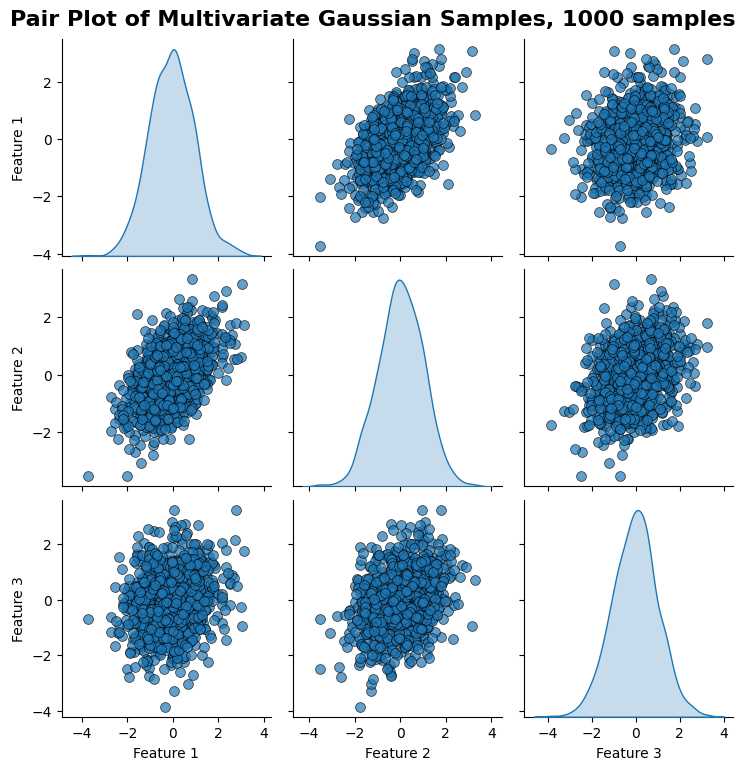

In [ ]:
def genPairPlot(samples: np.ndarray, count:int=1000):
    df = pd.DataFrame(samples, columns=['Feature 1', 'Feature 2', 'Feature 3'])
    sns.pairplot(df, diag_kind='kde', palette='Blues', plot_kws={'alpha': 0.7, 's': 50, 'edgecolor': 'k'})
    plt.suptitle(f'Pair Plot of Multivariate Gaussian Samples, {count} samples', fontsize=16, weight='bold', y=1.02)
    plt.show()

genPairPlot(samples_3d)

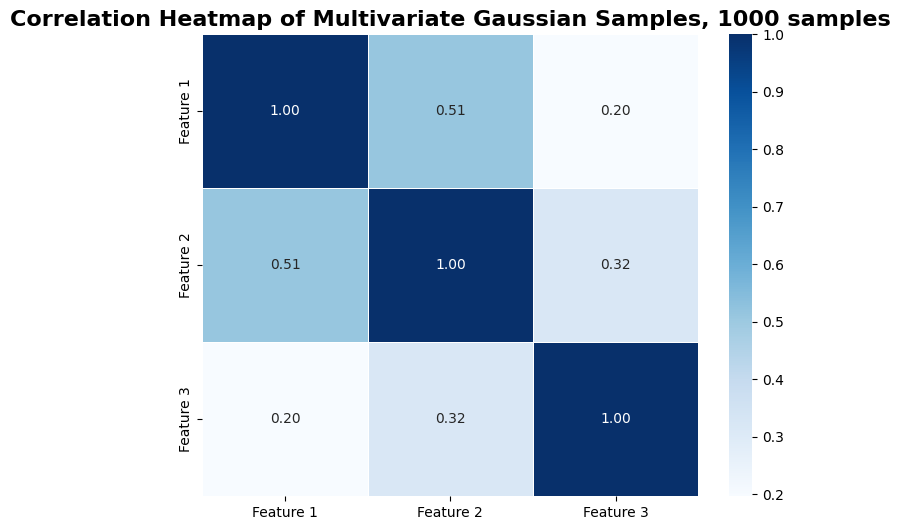

In [ ]:
# Implements the plotting of heatmap for correlation of different features
def genHeatmap_MV(samples: np.ndarray, count:int=1500):
    df = pd.DataFrame(samples, columns=['Feature 1', 'Feature 2', 'Feature 3'])
    corr_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Heatmap of Multivariate Gaussian Samples, {count} samples', fontsize=16, weight='bold')
    plt.show()

genHeatmap_MV(samples_3d, 1000)

In [ ]:
# End of Assignment